In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

갈비구이/  계란후라이/  꿀떡/      떡국_만두국/  삼겹살/      유부초밥/  주먹밥/
갈치구이/  고등어구이/  누룽지/    무국/         새우볶음밥/  육개장/    콩나물국/
감자전/    곱창구이/    닭갈비/    미역국/       생선전/      잡곡밥/    파전/
경단/      김밥/        더덕구이/  북엇국/       송편/        장어구이/  호박전/
계란국/    김치볶음밥/  동그랑땡/  불고기/       시래기국/    조개구이/  황태구이/
계란말이/  김치전/      떡갈비/    비빔밥/       알밥/        조기구이/  훈제오리/


In [2]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import torchvision.models as models
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import os
import unicodedata
import matplotlib.image as mpimg
from torch.utils.data import DataLoader
import natsort
from torchvision import models
import torch.nn.functional as F
from torchsummary import summary
import warnings
import time
from PIL import Image

In [3]:
# CUDA 사용 가능 여부 확인 및 디바이스 설정
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
# 데이터셋 경로 설정
data_root = "/content/drive/MyDrive"
train_dir = os.path.join(data_root, "train")
val_dir = os.path.join(data_root, "val")

In [5]:
# 이미지 전처리 및 데이터셋 설정
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    transforms.RandomHorizontalFlip(),  # 좌우 반전
    transforms.RandomVerticalFlip(),    # 상하 반전
    transforms.RandomRotation(90),      # 90도 회전
    transforms.ColorJitter(
        brightness=(0.5, 2),            # 밝기
        contrast=(0.5, 1.5),              # 대비
        saturation=(0.8, 1.5),          # 채도
    ),
    transforms.RandomResizedCrop(
        size=(240, 240),                # 잘라내고 조절할 크기
        scale=(0.8, 1.2)                # 스케일 범위 (줌인 및 줌아웃 효과)
    )
])
transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
train_dataset = ImageFolder(train_dir, transform=transform_train)
val_dataset = ImageFolder(val_dir, transform=transform_val)

# 데이터로더 설정
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


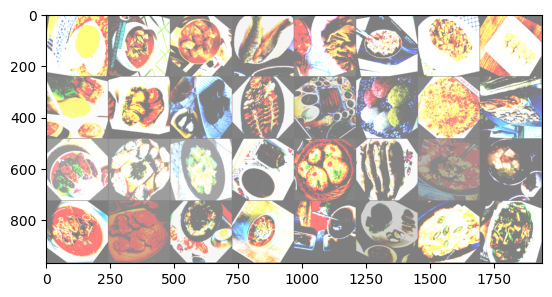

계란후라이 콩나물국 갈비구이 조기구이 불고기 훈제오리 새우볶음밥 경단 주먹밥 호박전 송편 장어구이 장어구이 경단 누룽지 삼겹살 유부초밥 유부초밥 계란국 시래기국 감자전 조기구이 육개장 북엇국 콩나물국 생선전 콩나물국 콩나물국 황태구이 잡곡밥 감자전 파전


In [ ]:
menu_folders = os.listdir(train_dir)
menu_folders = natsort.natsorted(menu_folders)
def imshow(img):
    img = img / 2 + 0.5  #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{menu_folders[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
!sudo apt-get install -y fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [ ]:
import matplotlib.font_manager as fm

# 나눔 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

plt.rcParams['font.family'] = 'NanumGothic'  # 폰트 패밀리 이름 (폰트 파일명과 동일해야 함)
plt.rcParams['font.size'] = 12

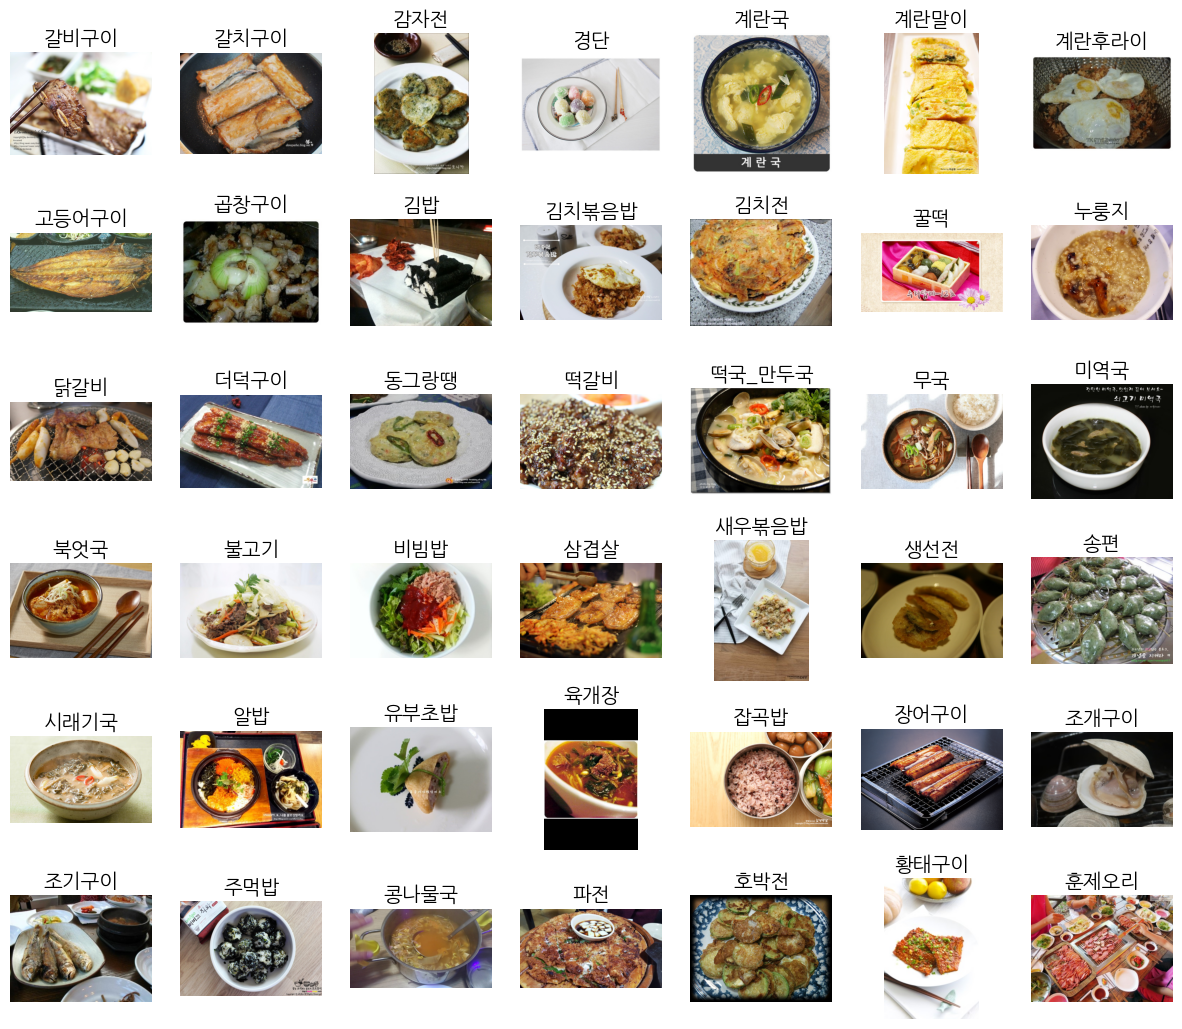

In [ ]:
plt.figure(figsize=(15, 15))

for i, trainfolder in enumerate(menu_folders):
    trainmenu_path = os.path.join(train_dir, trainfolder)
    imgfiles = os.listdir(trainmenu_path)

    for j, imgfile in enumerate(imgfiles[:1]):  # Take 1 image from each folder
        imgpath = os.path.join(trainmenu_path, imgfile)
        img = mpimg.imread(imgpath)

        name = unicodedata.normalize('NFC', trainfolder)  # Normalize the folder name
        plt.subplot(7, 7, i + 1)
        plt.imshow(img)
        plt.title(name)
        plt.axis('off')

plt.show()

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

resnet_pt = models.resnet50(pretrained=True)

#이전 파라미터 freezing
for param in resnet_pt.parameters():
  param.requires_grad = False


#fc layer수정
fc_in_features = resnet_pt.fc.in_features
resnet_pt.fc = nn.Linear(fc_in_features, len(trainfolder))
resnet_pt = resnet_pt.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


NameError: ignored

In [ ]:
net.to(device) #모델 구조 출력

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
warnings.filterwarnings("ignore", category=UserWarning)

In [8]:
# 모델 정의 (ResNet-50)
resnet50 = models.resnet50(pretrained=False)

# Reset Parameters (가중치 초기화)
def reset_parameters(module):
    if hasattr(module, 'reset_parameters'):
        module.reset_parameters()

resnet50.apply(reset_parameters)

# 마지막 Fully Connected Layer 변경
num_classes = 512  # 클래스 수
resnet50.fc = nn.Linear(2048, num_classes)

# 모델을 GPU로 이동
device = 'cuda' if torch.cuda.is_available() else 'cpu'
resnet50.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [9]:
# Loss 및 Optimizer 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet50.parameters(), lr=0.01, momentum=0.9)

In [ ]:
torch.save(resnet50.state_dict(), 'mission2_resnet50.pth')
torch.save(resnet50.state_dict(), 'mission2_resnet50.pt')

In [10]:
# 이전 모델 저장 코드
model_load_path1 = '/content/drive/MyDrive/mission1_resnet50.pth'
model_save_path1 = '/content/drive/MyDrive/model_path/mission1_resnet50.pt'

In [11]:
# 모델 저장 코드
model_load_path2 = '/content/drive/MyDrive/mission2_resnet50.pth'
model_save_path2 = '/content/drive/MyDrive/model_path/mission2_resnet50.pt'

In [12]:
# 이전 모델 불러온 후 augmentation으로 이어서 학습
# 모델 불러오기
checkpoint = torch.load(model_save_path2)
resnet50.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epochs = checkpoint['epoch']
loss = checkpoint['loss']

In [13]:
epochs

62

In [ ]:
#model1_resnet50, 50epoch을 augmentation해서 학습

In [ ]:
# 정확도 저장용 리스트
accuracy_list = []
# 이어서 학습할 에폭 수
additional_epochs = 38
# 모델을 저장하는 epoch주기
save_epochs = 1
# 검증 주기
validation_epochs = 1
# Training loop (이어서 학습)
for epoch in range(epochs, epochs + additional_epochs):
    resnet50.train()
    running_loss = 0.0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 500 == 499:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # 모델 저장 (필요한 경우)
    if (epoch + 1) % save_epochs == 0:
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': resnet50.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
        }
        torch.save(checkpoint, model_save_path2)

   # Initialize misclassified_examples list before the loop
    misclassified_examples = []

# 검증 데이터셋을 이용하여 accuracy를 계산하고 출력
    if epoch % validation_epochs == 0:
        resnet50.eval()  # 모델을 평가 모드로 전환
        correct = 0
        total = 0

        with torch.no_grad():
            for data in val_loader:
                inputs, labels = data[0].to(device), data[1].to(device)
                outputs = resnet50(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
           # 잘못 분류된 경우 확인

            misclassified_mask = predicted != labels
            misclassified_examples.extend([(inputs[i], predicted[i].item(), labels[i].item()) for i, is_misclassified in enumerate(misclassified_mask) if is_misclassified])


        accuracy = 100 * correct / total
        accuracy_list.append(accuracy)  # accuracy 리스트에 추가
        print(f'Validation Accuracy after {epoch+1}  epochs: {accuracy:.2f}%')

        resnet50.train()  # 모델을 다시 학습 모드로 전환

print('Continued Training Finished')

# 에폭별 accuracy 시각화
plt.plot(range(epochs + 1, epochs + additional_epochs + 1), accuracy_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.ylim(65, 100)
plt.show()

Epoch 63, Batch 500, Loss: 6.288
Epoch 63, Batch 1000, Loss: 6.314
Validation Accuracy after 63  epochs: 34.37%
Epoch 64, Batch 500, Loss: 6.135
Epoch 64, Batch 1000, Loss: 6.102
Validation Accuracy after 64  epochs: 32.11%
Epoch 65, Batch 500, Loss: 5.899
Epoch 65, Batch 1000, Loss: 6.024
Validation Accuracy after 65  epochs: 39.83%
Epoch 66, Batch 500, Loss: 5.789
Epoch 66, Batch 1000, Loss: 5.923
Validation Accuracy after 66  epochs: 44.59%
Epoch 67, Batch 500, Loss: 5.681
Epoch 67, Batch 1000, Loss: 5.723
Validation Accuracy after 67  epochs: 30.49%
Epoch 68, Batch 500, Loss: 5.497
Epoch 68, Batch 1000, Loss: 5.705
Validation Accuracy after 68  epochs: 44.38%
Epoch 69, Batch 500, Loss: 5.526
Epoch 69, Batch 1000, Loss: 5.573
Validation Accuracy after 69  epochs: 38.54%
Epoch 70, Batch 500, Loss: 5.369
Epoch 70, Batch 1000, Loss: 5.433
Validation Accuracy after 70  epochs: 36.26%
